In [2]:
import pickle
import pprint as pp
from pymatgen.analysis.local_env import BrunnerNN_real, CovalentBondNN, Critic2NN, CrystalNN, VoronoiNN
from pymatgen.entries.compatibility import Compatibility
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.periodic_table import Element
from gaspy.mongo import make_atoms_from_doc
from gaspy.atoms_operators import fingerprint_adslab, remove_adsorbate
#from pymatgen.analysis.chemenv.coordination_environments.coordination_geometries import CoordinationGeometry
from ase.io import read,write
from ase.visualize import view
import os
from tqdm import notebook
import numpy as np
import pymatgen as mg
from ase import Atoms
import ase
import pandas as pd
with open('/home/ahrehd0506/research/GASpy/CO_docs_slab_added.pkl', 'rb') as p_f:
    data = pickle.load(p_f)

In [3]:
data[0]

{'mongo_id': ObjectId('5d83020c30582ea2977a0e3e'),
 'adsorbate': 'CO',
 'mpid': 'mp-945',
 'miller': [1, 0, 0],
 'shift': 0,
 'top': False,
 'coordination': 'Ni-Ni-Ni-Ni-Pt',
 'neighborcoord': ['Ni:Ni-Ni-Ni-Ni-Pt-Pt-Pt-Pt',
  'Ni:Ni-Ni-Ni-Ni-Pt-Pt-Pt-Pt',
  'Pt:Ni-Ni-Ni-Ni-Ni-Ni-Ni-Ni-Pt-Pt-Pt',
  'Ni:Ni-Ni-Ni-Ni-Pt-Pt-Pt-Pt',
  'Ni:Ni-Ni-Ni-Ni-Pt-Pt-Pt-Pt'],
 'energy': -0.46283776999998416,
 'atoms': {'atoms': [{'symbol': 'Ni',
    'position': [1.387059262189295, -1.7933224336463374, -11.796033093555788],
    'tag': 0,
    'index': 0,
    'charge': 0.0,
    'momentum': [0.0, 0.0, 0.0],
    'magmom': 0.0},
   {'symbol': 'Pt',
    'position': [-0.0007766198142098,
     -0.00038212482309359997,
     -12.931116553253712],
    'tag': 0,
    'index': 1,
    'charge': 0.0,
    'momentum': [0.0, 0.0, 0.0],
    'magmom': 0.0},
   {'symbol': 'Ni',
    'position': [1.3657689789694962, -1.8197366298702837, -14.380468605842372],
    'tag': 0,
    'index': 2,
    'charge': 0.0,
    'momentum': [0.0

In [4]:
data[0]['atoms']['chemical_symbols']
symbols = []
energy = []
for i in data:
    symbol = i['atoms']['chemical_symbols']
#    symbol.remove('H')
    symbol.remove('C')
    symbol.remove('O')
    if symbol not in symbols :
        symbols.append(symbol)
        
e_for_sym = {}
for symbol in symbols:
    e_for_sym[str(symbol)] = []
    for datum in data:
        if datum['atoms']['chemical_symbols'] == symbol:
            e_for_sym[str(symbol)].append(datum['energy'])
            
avg_e_for_sym = {}
for key in e_for_sym.keys():
    avg = np.mean(e_for_sym[key])
    avg_e_for_sym[key] = avg

In [5]:
e_for_sym = {}
for symbol in symbols:
    e_for_sym[str(symbol)] = []
    for datum in data:
        if datum['atoms']['chemical_symbols'] == symbol:
            e_for_sym[str(symbol)].append(datum['energy'])
    

In [6]:
avg_e_for_sym = {}
for key in e_for_sym.keys():
    avg = np.mean(e_for_sym[key])
    avg_e_for_sym[key] = avg

In [8]:
elements = {}
for datum in data:
    for element in datum['atoms']['chemical_symbols']:
        if element not in elements:
            elements[element] = []
            elements[element].append('.')
        if element in elements:
            elements[element].append('.')

for key in elements.keys():
    count = len(elements[key])
    elements[key] = count
#        if element not in elements:
#            elements.append(element)
sorted_elements = {k: v for k, v in sorted(elements.items(), key=lambda item: item[1])}
print(list(sorted_elements.keys()))

['Zr', 'Sc', 'P', 'Hf', 'Y', 'Tc', 'Cs', 'Ta', 'Te', 'K', 'Sr', 'Cd', 'Nb', 'Bi', 'Cr', 'Ru', 'Mn', 'Mo', 'H', 'Os', 'Pb', 'Ti', 'W', 'Re', 'N', 'Co', 'Ag', 'Ir', 'Rh', 'V', 'Fe', 'Na', 'Sb', 'As', 'S', 'Ge', 'Zn', 'Se', 'Ni', 'In', 'Sn', 'Ga', 'Pt', 'Au', 'Pd', 'Ca', 'Si', 'Al', 'Cu']


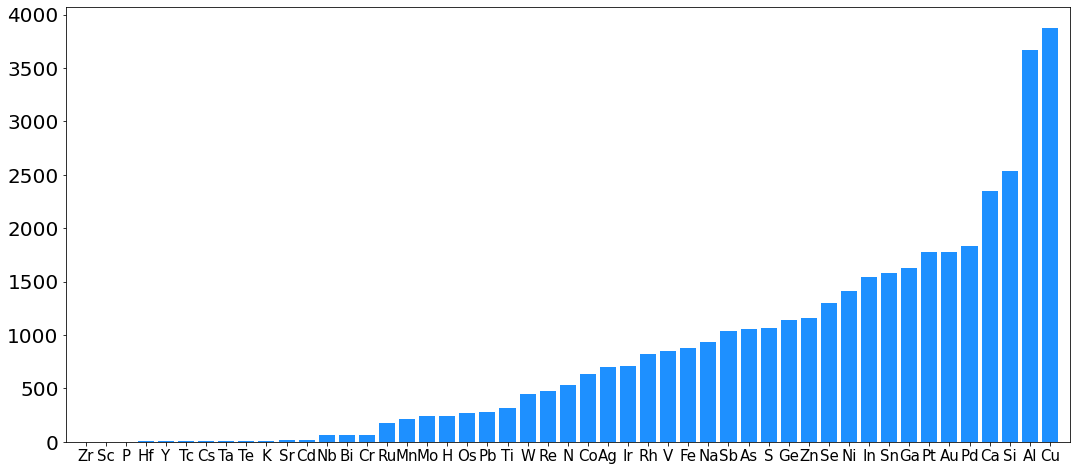

In [14]:
import matplotlib.pyplot as plt

x = list(sorted_elements.keys())
y = [sorted_elements[key] for key in x]

fig, ax = plt.subplots(figsize=[18,8])
ax.bar(x,y,color='dodgerblue')
ax.set_xticks(list(range(0,len(x))))
ax.set_xticklabels(x,size=15)
ax.set_xlim(-1,len(x))
ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])
ax.set_yticklabels([0,500,1000,1500,2000,2500,3000,3500,4000],size=20)

plt.savefig('elem_histo.svg')